In [80]:
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
import pymysql
from matplotlib.animation import FuncAnimation

In [42]:
Dataframe = pd.read_hdf(os.path.join('Ls_01f_exp01_FreeDLC_resnet50_TwoPointsMar23shuffle1_10000.h5'))

In [43]:
Dataframe

scorer    DLC_resnet50_TwoPointsMar23shuffle1_10000                         \
bodyparts                                 bodypart1                          
coords                                            x           y likelihood   
0                                        657.841064  335.857941   0.995142   
1                                        658.696655  335.070312   0.995186   
2                                        658.958374  335.606171   0.994851   
3                                        658.107483  335.101990   0.994028   
4                                        657.813232  334.786133   0.993480   
...                                             ...         ...        ...   
3044                                     671.687500  348.531616   0.987853   
3045                                     672.580688  347.191711   0.991994   
3046                                     672.067627  348.872070   0.987849   
3047                                     672.559937  348.103760   0.989281   
3048                                     671.416931  348.732361   0.985859   

scorer                                        
bodyparts   bodypart2                         
coords              x           y likelihood  
0          625.735840  379.436584   0.975997  
1          626.920166  379.469971   0.979702  
2          626.150452  379.454010   0.978917  
3          626.158081  379.403870   0.976551  
4          624.834595  379.276672   0.981060  
...               ...         ...        ...  
3044       626.967773  372.542816   0.991383  
3045       627.559937  371.846619   0.991410  
3046       627.581055  372.239502   0.992000  
3047       627.163025  371.783142   0.992064  
3048       626.313232  371.710480   0.992407  

[3049 rows x 6 columns]

In [44]:
scorer=Dataframe.columns.get_level_values(0)[0] 
scorer

'DLC_resnet50_TwoPointsMar23shuffle1_10000'

In [45]:
pcutoff=.5
Index=Dataframe[scorer]['bodypart1']['likelihood'].values > pcutoff

In [56]:
a1=Dataframe[scorer]['bodypart1']['x'].values[Index]
b1=Dataframe[scorer]['bodypart1']['y'].values[Index]
a2=Dataframe[scorer]['bodypart2']['x'].values[Index]
b2=Dataframe[scorer]['bodypart2']['y'].values[Index]

In [65]:
y = np.zeros_like(a1)

for i in range(len(a1)):
    if a2[i] > a1[i] and b2[i] < b1[i]:
        y[i] = np.rad2deg(np.arctan((a2[i]-a1[i])/(b1[i]-b2[i])))
    elif a2[i] > a1[i] and b2[i] > b1[i]:
        y[i] = 90 + np.rad2deg(np.arctan((b2[i]-b1[i])/(a2[i]-a1[i])))
    elif a2[i] < a1[i] and b2[i] > b1[i]:
        y[i] = 180 + np.rad2deg(np.arctan((a1[i]-a2[i])/(b2[i]-b1[i])))
    elif a2[i] < a1[i] and b2[i] < b1[i]:
        y[i] = 270 + np.rad2deg(np.arctan((b1[i]-b2[i])/(a1[i]-a2[i])))

y

array([216.37978842, 215.59100327, 216.80464758, ..., 242.28843172,
       242.45310425, 243.00339214])

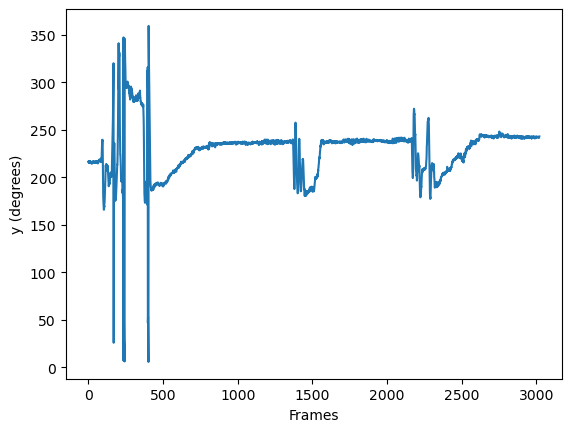

In [86]:
plt.plot(range(len(y)), y)
plt.xlabel('Frames')
plt.ylabel('y (degrees)')
plt.show()

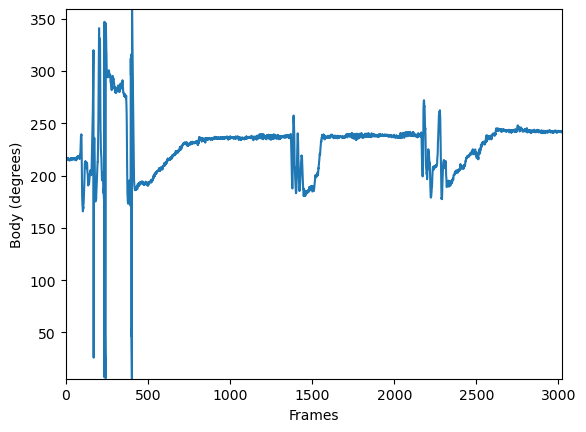

In [89]:
fig, ax = plt.subplots()
line, = ax.plot([], [])
ax.set_xlim(0, len(y))
ax.set_ylim(np.min(y), np.max(y))
ax.set_xlabel('Frames')
ax.set_ylabel('Body (degrees)')

def update(frame):
    line.set_data(range(frame), y[:frame])
    return line,

duration = len(y) / 100.0  
fps = 100  
num_frames = len(y)
anim = FuncAnimation(fig, update, frames=num_frames, blit=True)

anim.save('animation.mp4', fps=fps, writer="ffmpeg")

plt.show()